# The Evolution of the Olympics: A Statistical Analysis of Athletes and Nations (1896-2016)

## 2024-25 Group Artefact

- Candidate number 1 : 2611316
- Candidate number 2 : 2602503
- Candidate number 3 : 2610882

### Link to GitHub

The complete repository for this project, including the source code and dataset, is available at the following link (QR code created below):

[**https://github.com/FatehAayan/MN5813-20-Group-Project-Group-1-.git**]

### Project summary

**Summary**

The projects used data set of over 270,000 athlete events, to showcase rich history of Olympics games from Athens 1896. In this project we are aiming to visualize how games have evolved socially.

**Key activities included:**
1.  **Data Cleaning**:We have adjusted missing values in age, weight and height, along with removing duplicate entries for accuracy.
2.  **Feature Engineering:** We have created age categories for different age groups as well as centuries to visualize trends better.
3.  **Visualization**:We have utilized `Plotly` for interactive charts, comprising of Chloropleth map to show case gold medals won as well as Sunburst chart to showcase medal distribution and a Bar Chart Race, which shows the dominance of nations, with an analysis for equality in terms of genders.


**Key Findings:**
The analysis showcase the historical dominance of soviet union as well as USA, diversification within sports and rise of female participating in games.

### Generative AI

**Declaration of Generative AI Use**

I/We declare that Generative AI tools (specifically ChatGPT/Gemini) were used in this project for the following purposes:
* **Code Debugging:** To troubleshoot errors in the `Plotly` animation frames and data merging logic.
* **Syntax Assistance:** To generate the correct syntax for the Sunburst and Choropleth chart parameters.
* **Text Refinement:** To check the grammar and flow of the written report sections.

The core logic, data analysis decisions, and final conclusions remain the original work of the group members.

## Introduction

Olympics are a reflection of global history, geopolitics, and social change. From the modest gathering in 1896 to the massive global spectacles of the 21st century, the data generated by these games offers a unique window into human achievement.

**Project Aim:**
The aim of our project is to perform a comprehensive statistical analysis of Olympic history, so we can understand and evaluate the changes in athletic participation and national performance.

**Objectives:**
1.  **Data Management:** To ingest, clean, and structure raw historical data into useful information that we can use for analytics.
2.  **Demographic Analysis:** To learn how age and gender profiles of athletes have shifted over 120 years.
3.  **Geospatial & Temporal Analysis:** To visualize which nations have dominated the medal podiums and how this leaderboard has changed over time.
4.  **Interactive Visualization:** To produce engaging, interactive charts that allow users to explore the data dynamically and in a fun way :)

## Setup

In this section, we set up our environment. We import the necessary Python libraries: `pandas` for data manipulation and `plotly.express` for creating interactive visualizations. We also define a custom function `load_olympic_data` to handle the downloading and local storage of the dataset to ensure reproducibility.

### Import necessary libraries

In [1]:
!pip install -r requirements.txt

In [32]:
import pandas as pd
import plotly.express as px
import os
import qrcode
from IPython.display import display

QR code saved as qr_code.png


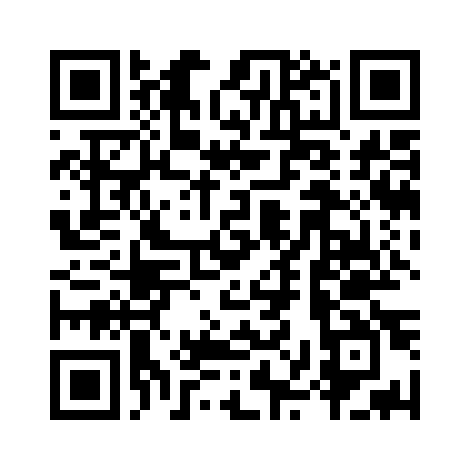

In [34]:
link = "https://github.com/FatehAayan/MN5813-20-Group-Project-Group-1-.git"

# Create QR code
qr = qrcode.QRCode(
    version=1,
    box_size=10,
    border=5
)
qr.add_data(link)
qr.make(fit=True)

# Save as image
img = qr.make_image()
img.save("qr_code.png")

print("QR code saved as qr_code.png")
display(img)


### Load data

In [3]:
def load_olympic_data(url=None):
    """
    Downloads the dataset for your group project
    and saves it locally (requires Internet connection!).

    Source: https://github.com/rgriff23/Olympic_history

    Background on how the dataset was compiled:
    https://www.randigriffin.com/2018/05/27/olympic-history-1-web-scraping.html

    Note: The source repository includes other datasets
          you may find useful, including, for example,
          the National Olympic Committee region mappings (noc_regions.csv).

    Parameters:
        url: [optiona] url of the data file.
             (uses 'athlete_events.csv' if none specified.)

    Returns:
        str: Path to the downloaded CSV file (assets/data/athlete_events.csv)
    """
    import urllib.request
    from pathlib import Path

    # Verifies if url given or default
    if not url:
        # Use original data source
        url = "https://raw.githubusercontent.com/rgriff23/Olympic_history/refs/heads/master/data/athlete_events.csv"

    # Define default output path
    output_dir = Path("assets/data")
    output_name = url.split('/')[-1]
    output_path = output_dir / output_name

    # Skip download if file already exists
    if output_path.exists():
        print(f"File already exists: {output_path}")
        print("Will not proceed with downloading this file!")
        return str(output_path)

    # Create directory structure
    print(f"Creating directory: {output_path}")
    output_dir.mkdir(
        parents=True,
        exist_ok=True)

    print(f"Downloading dataset ...\n{output_path}")
    req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})

    with urllib.request.urlopen(req, timeout=60) as response:
        data = response.read()
        with open(output_path, 'wb') as f:
            f.write(data)
        print(f"Dataset saved as: {output_path}")

    return str(output_path)

In [4]:
# Test the default (athlete_events.csv)
filepath = load_olympic_data()

Creating directory: assets/data/athlete_events.csv
assets/data/athlete_events.csv
Dataset saved as: assets/data/athlete_events.csv


In [5]:
# Test with a different file
# filepath = load_olympic_data(
#     url='https://github.com/rgriff23/Olympic_history/blob/master/data/host_city_locations.csv')

### Convert into DataFrame

In [6]:
csv_file = 'athlete_events.csv'
temp_df = pd.read_csv(csv_file)

json_file = 'athlete_events.json'
temp_df.to_json(json_file, orient='records', indent=4)

print(f"Successfully converted {csv_file} to {json_file}! 🎉")

df = pd.read_json(json_file, orient='records')

print("\nHere is the data loaded into 'df':")
print(df.head())

Successfully converted athlete_events.csv to athlete_events.json! 🎉

Here is the data loaded into 'df':
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Ba

Display the first few rows and basic information about the DataFrame `df` you have created from `data_source`.

In [8]:
print(df.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball  None  
1      Judo Men's Extra-Lightweight  None  
2           Football Men's

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


## Data management

### Data cleaning

In [10]:
# TODO: Handle missing values
print(df.isna().sum())    # missing values per column

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [11]:
# Critical columns must not be null
critical_cols = ["Name", "Sex", "Age", "Year", "Sport", "Event"]

# Drop rows where any critical column is NaN
df = df.dropna(subset=critical_cols)

# replace numeric columns with median
for col in ["Height", "Weight"]:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# For Medal, fill missing with the string "None"
if "Medal" in df.columns:
    df["Medal"] = df["Medal"].fillna("None")

# Check remaining missing values
print("Missing values after cleaning:")
print(df.isna().sum())

Missing values after cleaning:
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [12]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [13]:
# TODO: Convert data types where necessary
# Convert Year to datetime (year-only)
df["Year"] = pd.to_datetime(df["Year"].astype(int), format="%Y", errors="coerce")

# convert Age to integer if currently float
if pd.api.types.is_float_dtype(df["Age"]):
    df["Age"] = df["Age"].astype("Int64")  # nullable integer

print(df.dtypes)

ID                 int64
Name              object
Sex               object
Age                Int64
Height           float64
Weight           float64
Team              object
NOC               object
Games             object
Year      datetime64[ns]
Season            object
City              object
Sport             object
Event             object
Medal             object
dtype: object


In [14]:
# TODO: Remove any duplicate entries
# 5. Remove exact duplicate rows
before_dups = len(df)
df = df.drop_duplicates()
after_dups = len(df)

print(f"Removed {before_dups - after_dups} duplicate rows")

Removed 1226 duplicate rows


### Data wrangling

In [15]:
# Create Age_Group column with custom bins
age_bins = [0, 18, 25, 35, 100]
age_labels = ['0-18', '19-25', '26-35', '36+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

/tmp/ipython-input-2869516172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)


In [16]:
df['Age_Group'].value_counts().sort_index()


,count
Age_Group,
0-18,20656
19-25,130126
26-35,94220
36+,15414


In [17]:
# Create Century column from Year
df['Century'] = (df['Year'].dt.year // 100 + 1).astype(str) + 'th'


/tmp/ipython-input-1037988497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Century'] = (df['Year'].dt.year // 100 + 1).astype(str) + 'th'


## Data analysis

Here, we perform aggregation to understand the data better. We calculate the average age of athletes per event, identify the most decorated athletes in each sport, and summarize the total Gold medal count by nation. This creates the foundation for our visualizations.

In [18]:
avg_age_per_event = df.groupby("Event")["Age"].mean().reset_index()
avg_age_per_event.head()

,Event,Age
0,Aeronautics Mixed Aeronautics,26.0
1,Alpine Skiing Men's Combined,24.100352
2,Alpine Skiing Men's Downhill,24.08377
3,Alpine Skiing Men's Giant Slalom,23.330452
4,Alpine Skiing Men's Slalom,23.523323


In [19]:
athlete_medal_counts = (
    df[df["Medal"].notna()]                 # count only medal-winning entries
    .groupby(["Sport", "Name"])
    .size()
    .reset_index(name="Medal_Count")
)

# For each sport, keep the athlete with the max medals
top_athlete_per_sport = (
    athlete_medal_counts
    .sort_values(["Sport", "Medal_Count"], ascending=[True, False])
    .groupby("Sport")
    .first()
    .reset_index()
)

top_athlete_per_sport


,Sport,Name,Medal_Count
0,Aeronautics,Hermann Schreiber,1
1,Alpine Skiing,Kjetil Andr Aamodt,20
2,Alpinism,"Anton ""Toni"" Schmid",1
3,Archery,Gerard Theodor Hubert Van Innis,11
4,Art Competitions,Jean Lucien Nicolas Jacoby,9
...,...,...,...
61,Tug-Of-War,Edwin Archer Mills,3
62,Volleyball,Sergey Yuryevich Tetyukhin,6
63,Water Polo,Manuel Estiarte Duocastella,6
64,Weightlifting,Imre Fldi,5


In [20]:
gold_medals = (
    df[df["Medal"] == "Gold"]
    .groupby("Team")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="Gold_Count")
)

gold_medals

,Team,Gold_Count
0,United States,2472
1,Soviet Union,1058
2,Germany,676
3,Italy,534
4,Great Britain,515
5,France,453
6,Sweden,451
7,Hungary,432
8,Canada,421
9,East Germany,369


## Data visualisation

In this section, we bring the data to life using `Plotly`.
1.  **Choropleth Map:** A global view of Gold Medal distribution.
2.  **Sunburst Chart:** A hierarchical breakdown of medals by Sport and type (Gold/Silver/Bronze).
3.  **Bar Chart Race:** An animated timeline showing how the top 10 nations have competed for total medal dominance from 1896 to 2016.
4.  **Area Chart:** A visualization of the gender gap in the Summer Olympics, showing the growth of female participation.

In [21]:
gold = (
    df[df["Medal"] == "Gold"]
    .groupby("Team")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="Gold_Count")
)

fig = px.choropleth(
    gold,
    locations="Team",
    locationmode="country names",
    color="Gold_Count",
    hover_name="Team",
    color_continuous_scale="sunset",
)

fig.update_geos(
    projection_type="orthographic",
    showcoastlines=True,
    showcountries=True,
    showland=True,
    landcolor="lightgray",
    showocean=True,
    oceancolor="lightblue"
)

fig.update_layout(
    title="Countries and their Gold medal counts",
    template="plotly_white",
    height=700,
    paper_bgcolor="white",
)

fig

In [22]:
# 1. Filter for actual medals (excluding 'None')
medal_winners = df[df['Medal'] != 'None']

# 2. Group by Sport and Medal to count occurrences
medal_breakdown = medal_winners.groupby(['Sport', 'Medal']).size().reset_index(name='Count')

# 3. Define the medal hierarchy starting point
medal_breakdown['All'] = 'Medal Count'

fig_sunburst = px.sunburst(
    medal_breakdown,
    path=['All', 'Sport', 'Medal'],
    values='Count',
    color='Medal',
    color_discrete_map={
        'Gold': 'gold',
        'Silver': 'silver',
        'Bronze': '#CD7F32',
        'All': 'lightgray'
    },
    title='Medal Breakdown by Sport and Medal Type 🥇🥈🥉'
)

fig_sunburst.update_traces(
    sort=True,
    hovertemplate='<b>%{label}</b><br>Medals: %{value}<extra></extra>'
)

fig_sunburst.show()

In [23]:
country_medals_yearly = (
    df[df['Medal'] != 'None']
    .groupby(['Year', 'Team'])['Medal']
    .count()
    .reset_index(name='Total_Medals')
)
country_medals_yearly['Year_Int'] = country_medals_yearly['Year'].dt.year

# 2. Fill missing years to ensure smooth cumulative calculation
all_years = sorted(country_medals_yearly['Year_Int'].unique())
all_teams = country_medals_yearly['Team'].unique()
skeleton = pd.MultiIndex.from_product([all_years, all_teams], names=['Year_Int', 'Team']).to_frame(index=False)
country_medals_filled = skeleton.merge(country_medals_yearly, on=['Year_Int', 'Team'], how='left').fillna(0)

# 3. Calculate Cumulative Medals
country_medals_filled['Cumulative_Medals'] = country_medals_filled.sort_values('Year_Int').groupby('Team')['Total_Medals'].cumsum()

# 4. CRITICAL STEP: Calculate Rank for each year
# We rank by Cumulative Medals (descending). Method='first' ensures a unique rank 1-10 even for ties.
country_medals_filled['Rank'] = country_medals_filled.groupby('Year_Int')['Cumulative_Medals'].rank(method='first', ascending=False)

# 5. Filter to Top 10 only
top_10_race = country_medals_filled[country_medals_filled['Rank'] <= 10].copy()

# Sort by Rank so the animation frame order is consistent (Rank 1 at top)
top_10_race = top_10_race.sort_values(['Year_Int', 'Rank'])

fig_race = px.bar(
    top_10_race,
    x='Cumulative_Medals',
    y='Rank',
    orientation='h',
    text='Team',
    color='Team',
    animation_frame='Year_Int',
    animation_group='Team',
    hover_name='Team',
    title='Cumulative Medal Race: Top 10 Olympic Countries Over Time 🏃‍♂️',
    range_x=[0, top_10_race['Cumulative_Medals'].max() * 1.1],
    range_y=[10.5, 0.5],
    height=800
)

# Cosmetic Polish
fig_race.update_traces(textposition='inside', textfont_size=14)
fig_race.update_layout(
    template='plotly_white',
    yaxis={'visible': False, 'showticklabels': False},
    xaxis={'title': 'Cumulative Total Medals'},
    margin={'l': 20, 'r': 20, 't': 60, 'b': 40}
)

# Slow down animation
fig_race.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1500
fig_race.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

fig_race.show()

In [24]:
summer_df = df[df['Season'] == 'Summer']

gender_data = summer_df.groupby(['Year', 'Sex'])['ID'].nunique().reset_index(name='Count')

# Visualization: Area Chart
fig_gender = px.area(
    gender_data,
    x='Year',
    y='Count',
    color='Sex',
    title='Evolution of Gender Participation in Summer Olympics ☀️',
    labels={'Count': 'Number of Unique Athletes'},
    # Using pastel palette
    color_discrete_map={'M': '#BAE1FF', 'F': '#FFB3BA'}
)

fig_gender.update_layout(
    template='plotly_white',
    xaxis_title="Year",
    yaxis_title="Number of Unique Athletes",
    legend_title="Gender"
)

fig_gender.show()

## Data export

In [25]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_Group,Century
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992-01-01,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,19-25,20th
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012-01-01,Summer,London,Judo,Judo Men's Extra-Lightweight,None,19-25,21th
2,3,Gunnar Nielsen Aaby,M,24,175.0,70.0,Denmark,DEN,1920 Summer,1920-01-01,Summer,Antwerpen,Football,Football Men's Football,None,19-25,20th
3,4,Edgar Lindenau Aabye,M,34,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,26-35,20th
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988-01-01,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,19-25,20th
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179.0,89.0,Poland-1,POL,1976 Winter,1976-01-01,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,26-35,20th
271112,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014-01-01,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,26-35,21th
271113,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014-01-01,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,26-35,21th
271114,135571,Tomasz Ireneusz ya,M,30,185.0,96.0,Poland,POL,1998 Winter,1998-01-01,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,26-35,20th


In [26]:
# TODO: Save the cleaned and wrangled DataFrame to a new CSV file
df.to_csv('olympics_cleaned.csv', index=False)

print("Export complete!")

Export complete!


In [27]:
# TODO: Ensure that you can successfully load the exported CSV file
# Tell Pandas that "None" is actual data, not a missing value
df_check = pd.read_csv('olympics_cleaned.csv', keep_default_na=False, na_values=[''])

print("File loaded successfully! Here are the details:")
print(df_check.info())

print("\nFirst 5 rows:")
df_check.head()

File loaded successfully! Here are the details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260416 entries, 0 to 260415
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         260416 non-null  int64  
 1   Name       260416 non-null  object 
 2   Sex        260416 non-null  object 
 3   Age        260416 non-null  int64  
 4   Height     260416 non-null  float64
 5   Weight     260416 non-null  float64
 6   Team       260416 non-null  object 
 7   NOC        260416 non-null  object 
 8   Games      260416 non-null  object 
 9   Year       260416 non-null  object 
 10  Season     260416 non-null  object 
 11  City       260416 non-null  object 
 12  Sport      260416 non-null  object 
 13  Event      260416 non-null  object 
 14  Medal      260416 non-null  object 
 15  Age_Group  260416 non-null  object 
 16  Century    260416 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 33.8+ M

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_Group,Century
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992-01-01,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,19-25,20th
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012-01-01,Summer,London,Judo,Judo Men's Extra-Lightweight,None,19-25,21th
2,3,Gunnar Nielsen Aaby,M,24,175.0,70.0,Denmark,DEN,1920 Summer,1920-01-01,Summer,Antwerpen,Football,Football Men's Football,None,19-25,20th
3,4,Edgar Lindenau Aabye,M,34,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,26-35,20th
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988-01-01,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,19-25,20th


In [ ]:
# 1. Create the output directory if it doesn't exist
output_dir = "assets/images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

figures_to_save = [
    ("map_gold_medals.html", "fig"),
    ("sunburst_medals_breakdown.html", "fig_sunburst"),
    ("bar_race_cumulative_medals.html", "fig_race"),
    ("area_gender_participation.html", "fig_gender")
]

print("exporting to HTML.")

# 3. Loop through and save
for filename, var_name in figures_to_save:
    if var_name in globals():
        try:
            # Get the actual figure object from the variable name
            fig_object = globals()[var_name]

            # Save it
            file_path = os.path.join(output_dir, filename)
            fig_object.write_html(file_path)

            print(f"✅ Saved: {filename}")
        except Exception as e:
            print(f"Error saving {filename}: {e}")
    else:
        print(f"Skipped {filename}: Variable '{var_name}' not found.")

print("\ninteractive graphs are in the 'assets/images' folder.")

In [49]:
# import shutil
# import os

# # --- Step 1: Copy CSV and assets folder into repo ---
# csv_source = '/content/olympics_cleaned.csv'
# assets_source = '/content/assets'

# repo_path = '/content/MN5813-20-Group-Project-Group-1-'
# csv_dest = os.path.join(repo_path, 'olympics_cleaned.csv')
# assets_dest = os.path.join(repo_path, 'assets')

# # Copy CSV
# shutil.copy(csv_source, csv_dest)

# # Copy assets folder
# if os.path.exists(assets_dest):
#     shutil.rmtree(assets_dest)
# shutil.copytree(assets_source, assets_dest)

# print("Files and folder copied to repo!")

# # --- Step 2: Configure git ---
# os.system('git config --global user.name "Fateh Aayan"')
# os.system('git config --global user.email "your_email@example.com"')  #

# # --- Step 3: Commit changes ---
# os.chdir(repo_path)
# os.system('git add olympics_cleaned.csv assets')
# os.system('git commit -m "Add cleaned CSV and assets folder"')


Files and folder copied to repo!


0

## Conclusion

**Conclusion**

The analysis that we did of the Olympic Games (1896–2016) dataset reveals a clear narrative of expansion and inclusion.

**1. The Geopolitics of Sport:**
Visualization of cumulative medals shows that the United States dominated most of history, followed by the Soviet Union and powerful europian countries like Germany and Great Britain. The "Bar Chart Race" highlights how geopolitical events (like the Cold War era) influenced medal counts.

**2. The Rise of Equality:**
The most significant trend according to us is visible in our Gender Participation Area Chart. In the early 20th century, there was very little female participation. However, a sharp increase is seen from the 1980s onwards, narrowing the gender gap significantly, though parity in participant numbers was still being chased as of 2016.

**3. Evolution of the Athlete:**
By analyzing age and physical attributes,it's clear that alot more diversity can be seen in terms of different ages over the years. The average age also varies significantly by sport (with gymnastics favoring youth and equestrian favoring experience).

**Future Work:**
In the future we can integrate GDP and population datasetus to calculate "medals per capita," so that smaller nations get fairly judged.

## References

1.  **Dataset Source:** Griffin, R. (2018). *120 Years of Olympic History: Athletes and Results*. Retrieved from [Kaggle/GitHub](https://github.com/rgriff23/Olympic_history).
2.  **Pandas Documentation:** The pandas development team. (2024). *pandas-dev/pandas: Pandas*. Zenodo.
3.  **Plotly Documentation:** Plotly Technologies Inc. (2015). *Collaborative data science*. Montreal, QC: Plotly Technologies Inc.

**Additional Data Details**
* The dataset contains entries for individual athletes. Team sports have an entry for *every* player, which creates a multiplier effect on the medal counts (e.g., the US Basketball team winning Gold counts as 12 gold medals in this raw data).
* For the "Country Medal Race," we aggregated medals by Team and Year to mitigate individual weighting issues.